In [1]:
import os
os.getcwd() 

'/home/561/sm2435'

In [2]:
import sys
sys.path.append('/home/561/sm2435/perturb_access')



In [3]:
import umfile
from um_fileheaders import *
from numpy.random import MT19937, RandomState, SeedSequence


In [4]:
f = umfile.UMFile("/g/data/e14/sm2435/RESTARTS/cm000/restart/atm/cm000a.da09700101_00", 'r')


In [8]:
f2 = umfile.UMFile("/g/data/hh5/tmp/zg0866/ACCESS-CM2_archive/cm000/restart/atm/cm000a.da09700101_00", 'r')


In [33]:
f3 = umfile.UMFile("/home/561/sm2435/cylc-run/u-de695/share/data/de695.astart", 'r')



In [31]:
f4 = umfile.UMFile("/home/561/sm2435/cylc-run/u-dd756/share/data/dd756.astart", 'r')

In [29]:
for k in range(f3.fixhd[FH_LookupSize2]):
    ilookup = f3.ilookup[k]
    lbegin = ilookup[LBEGIN] # lbegin is offset from start
    if lbegin == -99:
        break
    if ilookup[ITEM_CODE] == 4:
        print(k)

170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
10054
10055
10056
10057
10058
10059
10060
10061
10062
10063
10064
10065
10066
10067
10068
10069
10070
10071
10072
10073
10074
10075
10076
10077
10078
10079
10080
10081
10082
10083
10084
10085
10086
10087
10088
10089
10090
10091
10092
10093
10094
10095
10096
10097
10098
10099
10100
10101
10102
10103
10104
10105
10106
10107
10108
10109
10110
10111
10112
10113
10114
10115
10116
10117
10118
10119
10120
10121
10122
10123
10124
10125
10126
10127
10128
10129
10130
10131
10132
10133
10134
10135
10136
10137
10138


In [11]:
f

In [12]:
f.fixhd[FH_LookupSize2]

15719

In [13]:
f.ilookup[3566][LBEGIN]

88967680

In [14]:
import matplotlib.pyplot as plt

In [15]:
peturb_files = f.readfld(170) - f2.readfld(170)

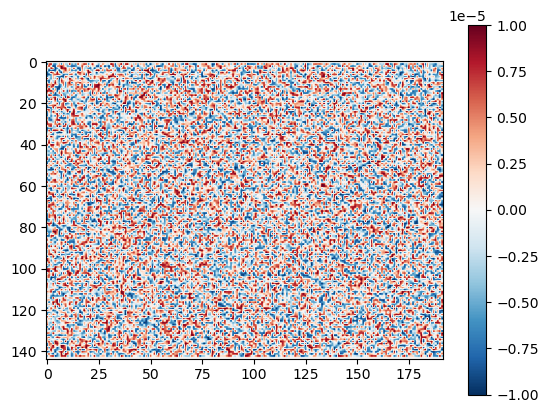

In [16]:
plt.imshow((f.readfld(170) - f2.readfld(170)), vmin = -1e-5, vmax =1e-5, cmap = "RdBu_r")
plt.colorbar()

In [28]:
f3.readfld(170)

array([[285.80820525, 285.83224006, 285.84046256, ..., 285.6438137 ,
        285.73557842, 285.67813152],
       [285.67988504, 285.45988079, 285.49947407, ..., 285.66685926,
        285.38978287, 285.6145243 ],
       [285.11996149, 285.4154377 , 285.37539079, ..., 284.71039817,
        285.00517074, 285.04877491],
       ...,
       [231.19803012, 231.19163307, 231.21770812, ..., 231.27901739,
        231.24186227, 231.2147013 ],
       [231.65470075, 231.67857274, 231.70090745, ..., 231.62092088,
        231.62675876, 231.63678248],
       [232.3745625 , 232.37947397, 232.39678773, ..., 232.35126224,
        232.36781693, 232.35253833]])

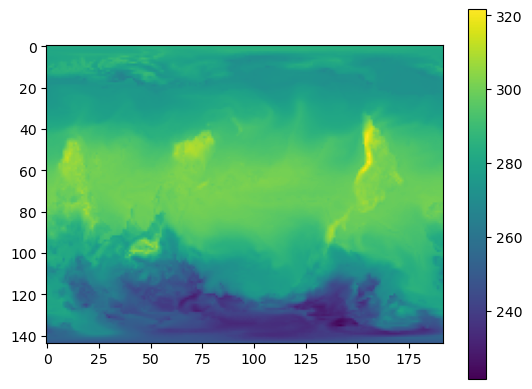

In [30]:
plt.imshow(f2.readfld(170))
plt.colorbar()

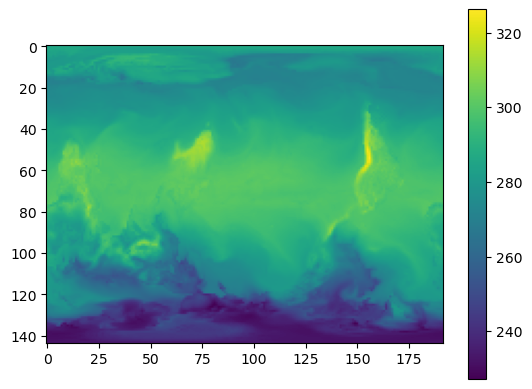

In [27]:
plt.imshow(f3.readfld(170))
plt.colorbar()

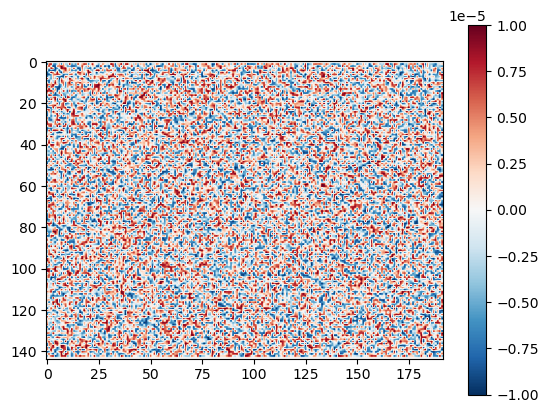

In [35]:
plt.imshow((f3.readfld(170) - f4.readfld(170)), vmin = -1e-5, vmax =1e-5, cmap = "RdBu_r")
plt.colorbar()

In [23]:
from numpy.random import MT19937, RandomState, SeedSequence

In [24]:
seed = 1234

In [25]:
rs = RandomState(MT19937(SeedSequence(seed)))

In [26]:
amplitude = 0.00001

In [27]:
# Set up theta perturbation.
nlon = 192
nlat = 144
# Same at each level so as not to upset vertical stability
perturb = amplitude * (2.*rs.random(nlon*nlat).reshape((nlat,nlon)) - 1.)

In [28]:
# Set poles to zero (only necessary for ND grids, but doesn't hurt EG)
perturb[0] = 0.
perturb[-1] = 0.

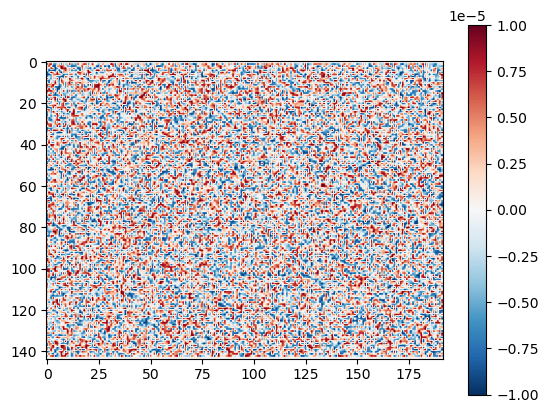

In [29]:
plt.imshow((perturb), vmin = -1e-5, vmax =1e-5, cmap = "RdBu_r")
plt.colorbar()

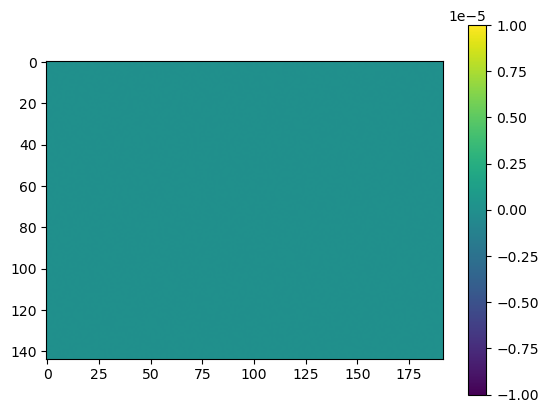

In [33]:
plt.imshow((perturb - peturb_files), vmin = -1e-5, vmax = 1e-5)
plt.colorbar()

In [4]:
import um_fileheaders as umfh

In [5]:
umfh

<module 'um_fileheaders' from '/home/561/sm2435/perturb_access/um_fileheaders.py'>

In [6]:
import xarray as xr

In [9]:
f3 = umfile.UMFile("/scratch/e14/sm2435/archive/de614/history/atm/de614a.pd0990jan")

In [10]:
f4 = umfile.UMFile("/scratch/e14/sm2435/archive/dd756/history/atm/dd756a.pd0990jan")

In [21]:
tes = f3.readheader()

In [28]:
f3.ilookup[15000]

array([-99, -99, -99, -99, -99, -99, -99, -99, -99, -99, -99, -99, -99,
       -99, -99, -99, -99, -99, -99, -99, -99, -99, -99, -99, -99, -99,
       -99, -99, -99, -99, -99, -99, -99, -99, -99, -99, -99, -99, -99,
       -99, -99, -99, -99, -99, -99, -99, -99, -99, -99, -99, -99, -99,
       -99, -99, -99, -99, -99, -99, -99, -99, -99, -99, -99, -99])

In [24]:
for k in range(f3.fixhd[FH_LookupSize2]):
    ilookup = f3.ilookup[k]
    lbegin = ilookup[LBEGIN] # lbegin is offset from start
    if lbegin == -99:
        break
    if ilookup[ITEM_CODE] == 4:
        print(k)

In [15]:
plt.imshow(f4.readfld(170) - f3.readfld(170))

OSError: [Errno 22] Invalid argument